In [1]:
# No se tiene el ajuste
# 2.5
import pandas as pd
import matplotlib.pylab as plt
from scipy.ndimage.filters import gaussian_filter
import numpy as np

/tmp/ipykernel_5459/3789285717.py:3: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


In [3]:
df = pd.read_csv("Colombia_COVID19_Coronavirus_casos_diarios.csv")
df.head(5)

OBJECTID  NUEVOS_CASOS  TOTAL_CASOS  TOTAL_MUERTES  TOTAL_RECUPERADOS  \
0      1237             1            1              0                  0   
1      1238             0            1              0                  0   
2      1239             0            1              0                  0   
3      1240             2            3              0                  0   
4      1241             0            3              0                  0   

      FECHA_ACTUALIZACION                              GlobalID  \
0  2020/03/06 05:00:00+00  bfbde439-2467-4f24-9b33-2fb38e3abd61   
1  2020/03/07 05:00:00+00  c21b35c0-d55e-44e0-8768-9356c9c1d545   
2  2020/03/08 05:00:00+00  0a1a91f7-15eb-4118-9879-1ab4d959b1d2   
3  2020/03/09 05:00:00+00  2fb6f539-a27c-4d00-84e1-b19193ceb500   
4  2020/03/10 05:00:00+00  f14b28c9-d593-4a53-9e2a-d7965c38c22c   

   NUEVOS_MUERTOS  NUEVO_RECUPERADOS  
0               0                  0  
1               0                  0  
2               0                  0  
3               0                  0  
4               0                  0

In [5]:
df_max_scaled=df.copy() #Se hace una copia del DataFrame para no modificar los ini
df_max_scaled["norm_new_cases"] = df_max_scaled["NUEVOS_CASOS"]/df_max_scaled["NUEVOS_CASOS"].abs().max() #Se normalizan los datos "NUEVOS_CASOS"
df_max_scaled.head()

OBJECTID  NUEVOS_CASOS  TOTAL_CASOS  TOTAL_MUERTES  TOTAL_RECUPERADOS  \
0      1237             1            1              0                  0   
1      1238             0            1              0                  0   
2      1239             0            1              0                  0   
3      1240             2            3              0                  0   
4      1241             0            3              0                  0   

      FECHA_ACTUALIZACION                              GlobalID  \
0  2020/03/06 05:00:00+00  bfbde439-2467-4f24-9b33-2fb38e3abd61   
1  2020/03/07 05:00:00+00  c21b35c0-d55e-44e0-8768-9356c9c1d545   
2  2020/03/08 05:00:00+00  0a1a91f7-15eb-4118-9879-1ab4d959b1d2   
3  2020/03/09 05:00:00+00  2fb6f539-a27c-4d00-84e1-b19193ceb500   
4  2020/03/10 05:00:00+00  f14b28c9-d593-4a53-9e2a-d7965c38c22c   

   NUEVOS_MUERTOS  NUEVO_RECUPERADOS  norm_new_cases  
0               0                  0        0.000028  
1               0                  0        0.000000  
2               0                  0        0.000000  
3               0                  0        0.000056  
4               0                  0        0.000000

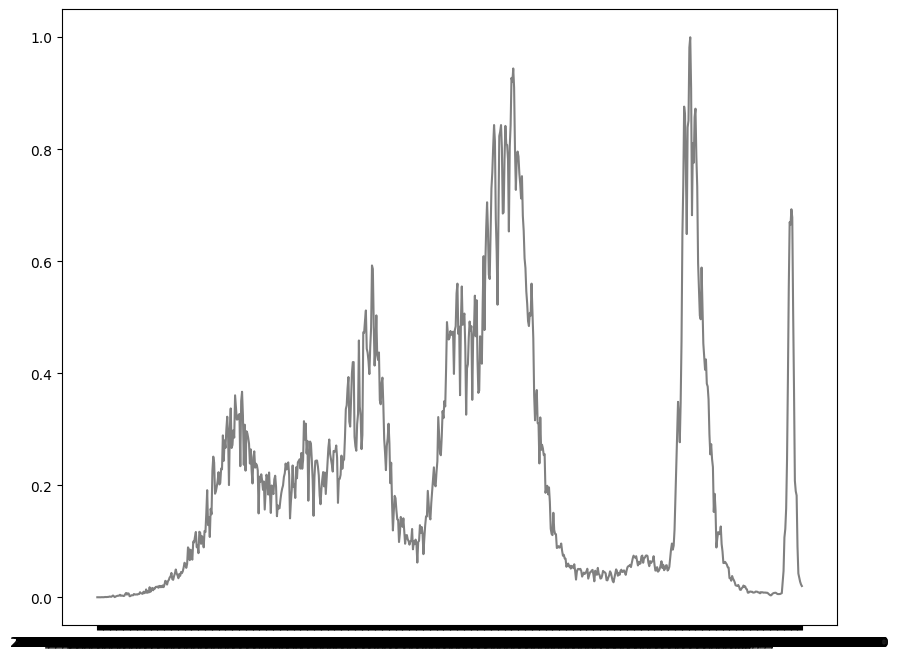

In [7]:
plt.figure(figsize=(10,8))
plt.plot(df_max_scaled["FECHA_ACTUALIZACION"],df_max_scaled["norm_new_cases"],color="gray")
plt.show()

In [8]:
df_max_scaled["FECHA_NUEVA"]=pd.to_datetime(df_max_scaled["FECHA_ACTUALIZACION"])

smoothed_cases = []
for date in sorted(df_max_scaled['FECHA_NUEVA']):
    df_max_scaled['gaussian'] =np.exp(
        -(((df_max_scaled['FECHA_NUEVA'] - date).apply(lambda x: x.days)) ** 2) / (2 * (2 ** 2))
    )
    df_max_scaled['gaussian'] /= df_max_scaled['gaussian'].sum()
    smoothed_cases.append(round(df_max_scaled['NUEVOS_CASOS'] * df_max_scaled['gaussian']).sum())


In [29]:
df_max_scaled["FECHA_NUEVA"]=pd.to_datetime(df_max_scaled["FECHA_ACTUALIZACION"])
smoothed_cases = []
for date in sorted(df_max_scaled['FECHA_NUEVA']):
    h=1
    df_max_scaled['gaussian'] =(3/4)*(1-(((df_max_scaled['FECHA_NUEVA'] - date).apply(lambda x: x.days)) ** 2) /h) if np.abs(df_max_scaled['FECHA_NUEVA'] - date) <= 1 else 0
    df_max_scaled['gaussian'] /= df_max_scaled['gaussian'].sum()
    smoothed_cases.append(round(df_max_scaled['NUEVOS_CASOS'] * df_max_scaled['gaussian']).sum())

TypeError: Invalid comparison between dtype=timedelta64[ns] and int

In [28]:

df_max_scaled['smoothed_new_cases'] = smoothed_cases

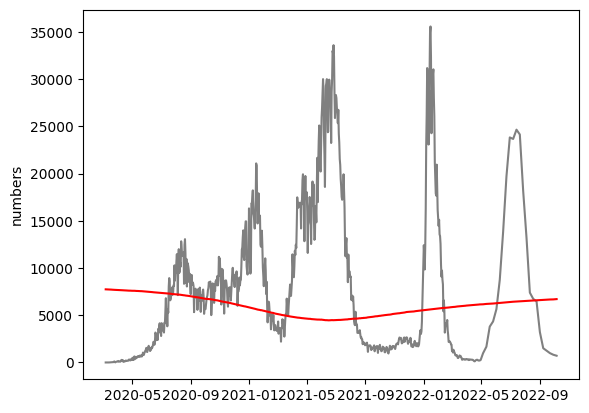

In [14]:
plt.plot(df_max_scaled["FECHA_NUEVA"],df_max_scaled["NUEVOS_CASOS"],color="gray")
plt.plot(df_max_scaled["FECHA_NUEVA"],df_max_scaled["smoothed_new_cases"],color="red")
plt.ylabel('numeros')
plt.show()